<a href="https://colab.research.google.com/github/vishakanilavan/Sentiment-Analysis-classification-and-Predictions/blob/main/Guvi_Ratings_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Libraries And Loading Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns


In [2]:
df=pd.read_csv("/content/drive/MyDrive/PROJECTS/3.1-data-sheet-guvi-courses.csv") # path of the Data file

In [3]:
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


# 2) Exploratory Data Analysis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [5]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [6]:
df.corr()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
course_id,1.000000,0.144206,-0.166254,-0.058279,-0.024102,0.054031,-0.056799
price,0.144206,1.000000,0.050555,0.113423,0.330233,0.031643,0.293245
num_subscribers,-0.166254,0.050555,1.000000,0.650761,0.158092,-0.007353,0.161844
num_reviews,-0.058279,0.113423,0.650761,1.000000,0.242986,0.004137,0.228842
num_lectures,-0.024102,0.330233,0.158092,0.242986,1.000000,-0.037170,0.801630
Rating,0.054031,0.031643,-0.007353,0.004137,-0.037170,1.000000,0.000650
content_duration,-0.056799,0.293245,0.161844,0.228842,0.801630,0.000650,1.000000


Highly co-related pair of features:


*   content_duration and num_lectures
*   num_subscribers and num_reviews



### 2.1) Handling Missing values:

In [7]:

df.isnull().sum()


course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3676 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.3+ KB


In [10]:
# Out of 3680 rows totaly 4 rows are eliminated;
# now there are 3676 rows in df after removing null values

### 2.2) Removing Unwanted Columns:

In [11]:
''' As columns like 'course_id','course_title','url','published_timestamp' are not related to 'Ratings'
(dependent variable),they are dropped'''
df.drop(['course_id','course_title','url','published_timestamp'],axis=1,inplace=True)

In [12]:
df

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development
...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3676 non-null   float64
 1   num_subscribers   3676 non-null   float64
 2   num_reviews       3676 non-null   float64
 3   num_lectures      3676 non-null   float64
 4   level             3676 non-null   object 
 5   Rating            3676 non-null   float64
 6   content_duration  3676 non-null   float64
 7   subject           3676 non-null   object 
dtypes: float64(6), object(2)
memory usage: 258.5+ KB


## 2.3) Encoding the Object/ Categorical Columns:

In [14]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

In [15]:
cleanup_nos={"level":{"All Levels":1,"Beginner Level":2,"Intermediate Level":3,"Expert Level":4}}
df=df.replace(cleanup_nos)

In [16]:
df['subject'].value_counts()

Subject: Web Development    1203
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: subject, dtype: int64

In [17]:
subject_nos={'subject':{'Subject: Web Development':1,'Business Finance':2,'Musical Instruments':3,'Graphic Design':4}}
df=df.replace(subject_nos)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3676 non-null   float64
 1   num_subscribers   3676 non-null   float64
 2   num_reviews       3676 non-null   float64
 3   num_lectures      3676 non-null   float64
 4   level             3676 non-null   int64  
 5   Rating            3676 non-null   float64
 6   content_duration  3676 non-null   float64
 7   subject           3676 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 258.5 KB


### 2.4) Checking for skewness/Normal distribution:

(array([ 288.,  465.,  251.,  177.,  159.,  196.,  168.,  425.,  517.,
        1030.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

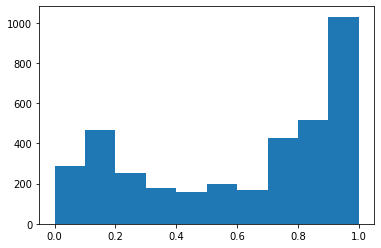

In [19]:

plt.hist(df['Rating'])

(array([ 288.,  465.,  186.,  242.,  159.,  179.,  173.,  437.,  517.,
        1030.]),
 array([4.60517019, 4.60616522, 4.60716025, 4.60815529, 4.60915032,
        4.61014535, 4.61114038, 4.61213542, 4.61313045, 4.61412548,
        4.61512052]),
 <BarContainer object of 10 artists>)

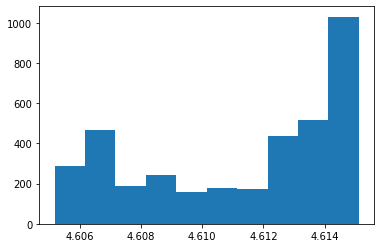

In [20]:
d=np.log(df["Rating"]+100)
plt.hist(d)
# can't transform into normal/balance distribution 

(array([3.248e+03, 2.920e+02, 7.400e+01, 2.600e+01, 1.500e+01, 9.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 3.000e+00]),
 array([ 0.  ,  7.85, 15.7 , 23.55, 31.4 , 39.25, 47.1 , 54.95, 62.8 ,
        70.65, 78.5 ]),
 <BarContainer object of 10 artists>)

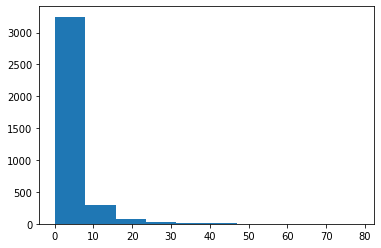

In [21]:
plt.hist(df['content_duration'])

(array([1.000e+00, 1.000e+00, 2.120e+02, 7.180e+02, 1.196e+03, 7.950e+02,
        4.850e+02, 1.940e+02, 5.300e+01, 2.100e+01]),
 array([-2.30258509, -1.63588941, -0.96919373, -0.30249806,  0.36419762,
         1.0308933 ,  1.69758898,  2.36428466,  3.03098034,  3.69767602,
         4.3643717 ]),
 <BarContainer object of 10 artists>)

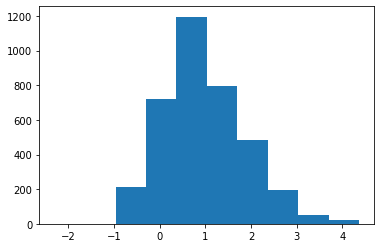

In [22]:
d=np.log(df['content_duration']+0.1) #When zero divide error occurs
plt.hist(d)
# Now the column become close to normal distribution

(array([1.000e+00, 1.000e+00, 2.120e+02, 7.180e+02, 1.196e+03, 7.950e+02,
        4.850e+02, 1.940e+02, 5.300e+01, 2.100e+01]),
 array([-2.30258509, -1.63588941, -0.96919373, -0.30249806,  0.36419762,
         1.0308933 ,  1.69758898,  2.36428466,  3.03098034,  3.69767602,
         4.3643717 ]),
 <BarContainer object of 10 artists>)

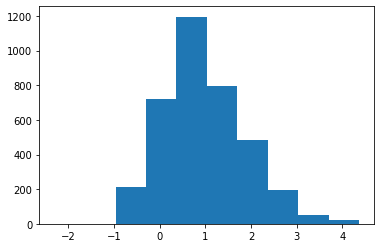

In [23]:
df['content_duration'] =d
plt.hist(df['content_duration'])

(array([3.269e+03, 3.030e+02, 5.500e+01, 2.100e+01, 1.600e+01, 7.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  77.9, 155.8, 233.7, 311.6, 389.5, 467.4, 545.3, 623.2,
        701.1, 779. ]),
 <BarContainer object of 10 artists>)

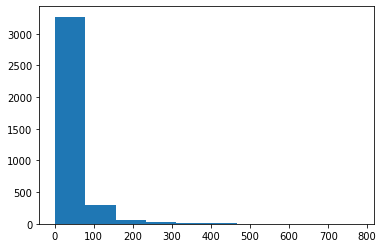

In [24]:
plt.hist(df['num_lectures'])

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 5.60e+01, 8.48e+02,
        1.70e+03, 8.51e+02, 1.85e+02, 3.50e+01]),
 array([-3.21887582, -2.231182  , -1.24348818, -0.25579436,  0.73189946,
         1.71959328,  2.70728711,  3.69498093,  4.68267475,  5.67036857,
         6.65806239]),
 <BarContainer object of 10 artists>)

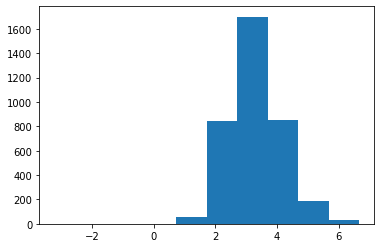

In [25]:
d=np.log(df['num_lectures']+0.04) #When zero divide error occurs
plt.hist(d)

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 5.60e+01, 8.48e+02,
        1.70e+03, 8.51e+02, 1.85e+02, 3.50e+01]),
 array([-3.21887582, -2.231182  , -1.24348818, -0.25579436,  0.73189946,
         1.71959328,  2.70728711,  3.69498093,  4.68267475,  5.67036857,
         6.65806239]),
 <BarContainer object of 10 artists>)

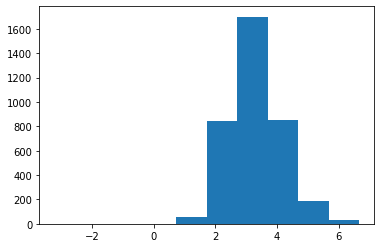

In [26]:
df['num_lectures']=d #When zero divide error occurs
plt.hist(df['num_lectures'])
# Now it becomes close to normal distribution

(array([3.649e+03, 1.100e+01, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2744.5,  5489. ,  8233.5, 10978. , 13722.5, 16467. ,
        19211.5, 21956. , 24700.5, 27445. ]),
 <BarContainer object of 10 artists>)

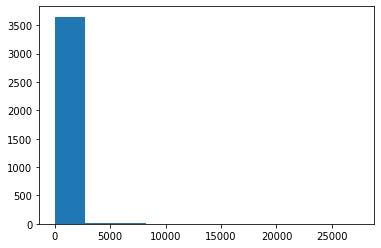

In [27]:
plt.hist(df['num_reviews'])

(array([284., 184., 453., 757., 942., 619., 293., 104.,  31.,   9.]),
 array([-2.30258509, -1.05033229,  0.20192051,  1.45417331,  2.70642611,
         3.95867892,  5.21093172,  6.46318452,  7.71543732,  8.96769012,
        10.21994292]),
 <BarContainer object of 10 artists>)

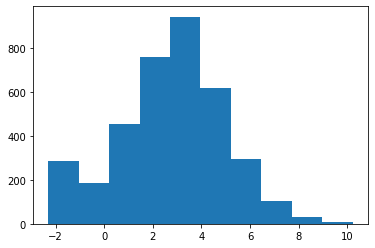

In [28]:
d=np.log(df['num_reviews']+0.1) #When zero divide error occurs
plt.hist(d)

(array([3.618e+03, 3.300e+01, 1.600e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0. ,  26892.3,  53784.6,  80676.9, 107569.2, 134461.5,
        161353.8, 188246.1, 215138.4, 242030.7, 268923. ]),
 <BarContainer object of 10 artists>)

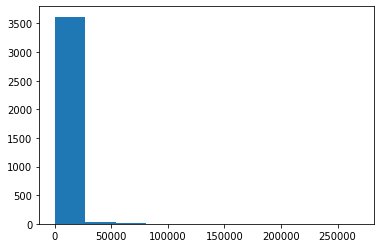

In [29]:
plt.hist(df['num_subscribers'])

(array([  65.,   49.,  167.,  307.,  452.,  652., 1206.,  615.,  145.,
          18.]),
 array([-2.30258509, -0.82210851,  0.65836807,  2.13884466,  3.61932124,
         5.09979783,  6.58027441,  8.06075099,  9.54122758, 11.02170416,
        12.50218074]),
 <BarContainer object of 10 artists>)

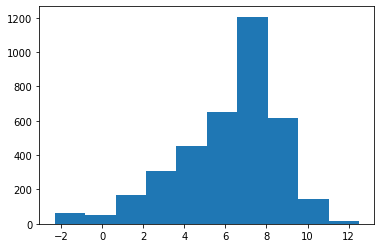

In [30]:
d=np.log(df['num_subscribers']+0.1) #When zero divide error occurs
plt.hist(d)

(array([ 311., 1263.,  802.,  211.,  232.,  168.,   78.,  127.,   28.,
         456.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

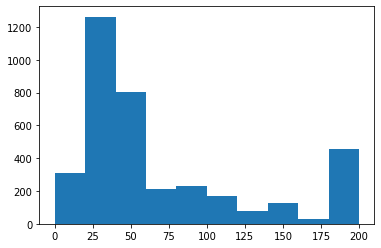

In [31]:
plt.hist(df['price'])

(array([311., 828., 435., 802., 131., 159., 321.,  88., 127., 474.]),
 array([4.60517019, 4.71503141, 4.82489264, 4.93475387, 5.0446151 ,
        5.15447633, 5.26433756, 5.37419879, 5.48406002, 5.59392125,
        5.70378247]),
 <BarContainer object of 10 artists>)

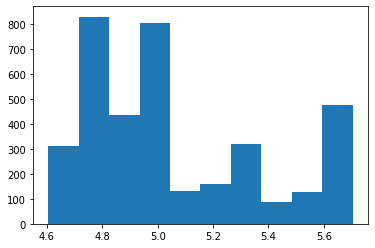

In [32]:
d=np.log(df['price']+100) #When zero divide error occurs
plt.hist(d)
# can't normalise the column by log transform




*   Only 'content_duration','num_lectures' columns are transformed to normal distribution.
*   Others are taken as it is because they can't normalise by log transform


 

### 2.5) Handling Outliers

In [33]:
# Detecting Outliers:
px.box(df)

In [34]:
# As we can see from boxplot, columns such as num_reviews, num_subscribers have many outliers

In [35]:
new_df=df.drop(['subject','level'],axis=1) # As these columns are encoded from categorical to ordinal

In [36]:
columns=new_df.columns
columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating',
       'content_duration'],
      dtype='object')

In [37]:
outlier_index=[]
for i in columns:
    import numpy as np
    q1=np.percentile(new_df[i],25,interpolation="midpoint")
    q3=np.percentile(new_df[i],75,interpolation="midpoint")
    print("q1 value of {i} is {q1}".format(i=i,q1=q1))
    iqr1=q3-q1
    print("q3 value of {i} is {q2}".format(i=i,q2=q3))
    print("iqr value of {i} is {iqr}".format(i=i,iqr=iqr1))
    lower=df.index[new_df[i]<(q1-1.5*iqr1)]
    lowercount=np.size(lower)
    print("Lower Outlier of {column} are {lower} counts".format(column=i,lower=lowercount))
    outlier_index.extend(lower)
    upper=df.index[new_df[i]>(q3+1.5*iqr1)]
    uppercount=np.size(upper)
    print("Upper Outlier of {column} are {upper} counts".format(column=i,upper=uppercount))
    outlier_index.extend(upper)
    totalcount=lowercount+uppercount
    print("Total Outliers of {column} is {x}".format(column=i,x=totalcount))
    

outlier_index.sort()
outlier_index1=sorted(set(outlier_index),key=outlier_index.index)  
print("Total outliers of all columns are",len(outlier_index))
print("Total unique outliers of all columns are",len(outlier_index1))

q1 value of price is 20.0
q3 value of price is 95.0
iqr value of price is 75.0
Lower Outlier of price are 0 counts
Upper Outlier of price are 0 counts
Total Outliers of price is 0
q1 value of num_subscribers is 112.0
q3 value of num_subscribers is 2558.0
iqr value of num_subscribers is 2446.0
Lower Outlier of num_subscribers are 0 counts
Upper Outlier of num_subscribers are 434 counts
Total Outliers of num_subscribers is 434
q1 value of num_reviews is 4.0
q3 value of num_reviews is 67.0
iqr value of num_reviews is 63.0
Lower Outlier of num_reviews are 0 counts
Upper Outlier of num_reviews are 494 counts
Total Outliers of num_reviews is 494
q1 value of num_lectures is 2.7107133185216936
q3 value of num_lectures is 3.829510583853682
iqr value of num_lectures is 1.1187972653319882
Lower Outlier of num_lectures are 1 counts
Upper Outlier of num_lectures are 44 counts
Total Outliers of num_lectures is 45
q1 value of Rating is 0.28
q3 value of Rating is 0.93
iqr value of Rating is 0.65
Lower

<ipython-input-37-4e996bb59760>:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-37-4e996bb59760>:5: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



In [38]:
685/3676 #19% datas are outliers

0.18634385201305767

In [39]:
# Dropping outliers
df=df.drop(outlier_index1)

In [40]:
df.info() 
#Reduced From 3676 rows to 2991 Rows (by dropping 685 Rows)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 325 to 3679
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2991 non-null   float64
 1   num_subscribers   2991 non-null   float64
 2   num_reviews       2991 non-null   float64
 3   num_lectures      2991 non-null   float64
 4   level             2991 non-null   int64  
 5   Rating            2991 non-null   float64
 6   content_duration  2991 non-null   float64
 7   subject           2991 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 210.3 KB


# 3) Building Models:

### 3.1) Splitting Datasets as Training and Testing Datasets:

In [41]:
from sklearn.model_selection import train_test_split
y=df['Rating']
x=df.drop(['Rating'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

### 3.2.1) Linear Regression:

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
r2 = model.score(x_test,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)

The r2 score of Training dataset for linear model is 0.03671881269327426
The r2 score of Testing Dataset for a linear model is 0.016894491809405165


### 3.2.2) Polynomial Regression Model:

In [43]:
#Fitting the polynomial Regression into data set
from sklearn.preprocessing import PolynomialFeatures

# Transform independent variables to polynomial features
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Train the model
model = LinearRegression()
model.fit(x_train_poly, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train_poly, y_train))
# Testing Test
r2 = model.score(x_test_poly,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)

The r2 score of Training dataset for linear model is 0.2970480674361893
The r2 score of Testing Dataset for a linear model is 0.18620848258423917


### 3.2.3) Decision Tree Model:

#### Finding Optimal Depth of Tree:

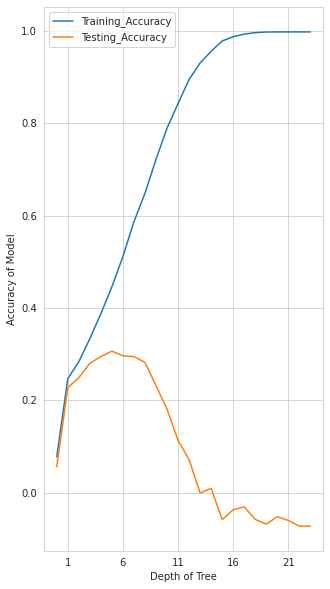

In [44]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
train_accuracy=[]
test_accuracy=[]
  
for i in range(1,25):
  # create a regressor object
  model3 = DecisionTreeRegressor(random_state = 1,max_depth=i) 
    
  # fit the regressor with X and Y data
  model3.fit(x_train, y_train)
  train_accuracy.append(model3.score(x_train,y_train))
 # print("The r2 score of Training dataset for linear model is",model3.score(x_train,y_train))
  # Testing Test
  test_accuracy.append(model3.score(x_test,y_test))
 # print('The r2 score of Testing Dataset for a linear model is', r2)

plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

 * From the plot, It is seen that Decision Tree model gives max 35% accuracy while testing. So It is better to look for 
other algorithms

### 3.2.4) GradientBoost Regressor:

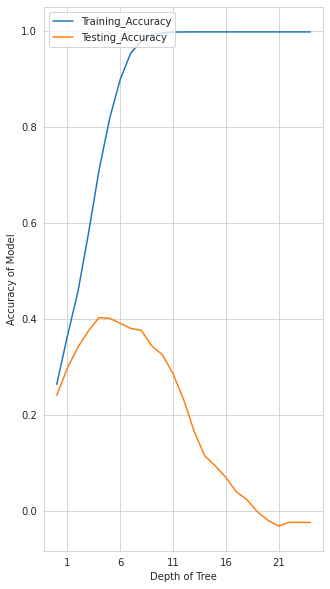

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = GradientBoostingRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(1,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

#### Building GradientBoosting Model with Optimal Depth:

In [46]:
# from the graph, we find optimal max_depth of Tree is 5
# so, let's build Gradient boost Model with max_depth as 5

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Train the model
model = GradientBoostingRegressor(n_estimators=100,max_depth=5, random_state=1)
model.fit(x_train, y_train)

# fit the regressor with X and Y data
model.fit(x_train, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
print('The r2 score of Testing Dataset for a linear model is', model.score(x_test,y_test))

The r2 score of Training dataset for linear model is 0.709185471683932
The r2 score of Testing Dataset for a linear model is 0.4021536326822278


### 3.2.5) Random Forest Model :

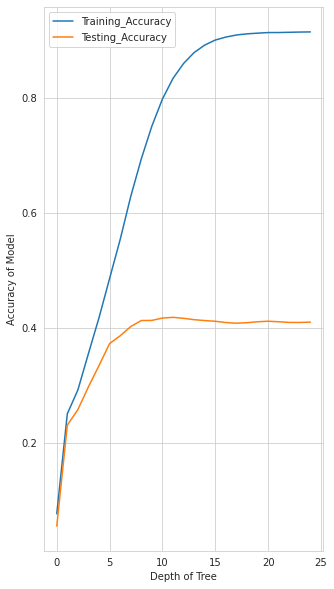

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = RandomForestRegressor(n_estimators=100,max_depth=i, random_state=1)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

#### Building Random Forest Model with optimum Depth:

In [48]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

# Train the model
model = RandomForestRegressor(n_estimators=500,max_depth=13, random_state=1)
model.fit(x_train, y_train)

# fit the regressor with X and Y data
model.fit(x_train, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
print('The r2 score of Testing Dataset for a linear model is', model.score(x_test,y_test))

The r2 score of Training dataset for linear model is 0.8643100832709465
The r2 score of Testing Dataset for a linear model is 0.4200632909789841


### 3.2.6)XG Boosting Model:

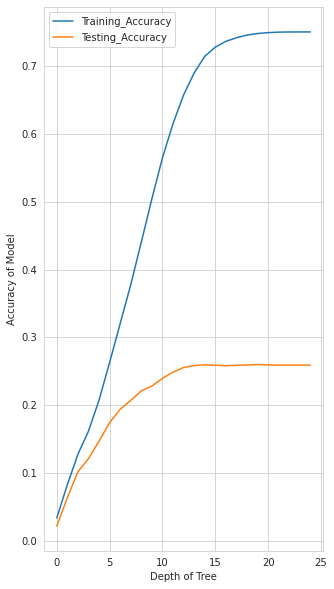

In [49]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as MSE

train_accuracy=[]
test_accuracy=[]

for i in range(1,26):
    # Train the model
    model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=i)
    model.fit(x_train, y_train)

    # fit the regressor with X and Y data
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train,y_train))
    #print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
    # Testing Test
    test_accuracy.append(model.score(x_test,y_test))
    #print('The r2 score of Testing Dataset for a linear model is', r2)
    
# plotting graph for finding optimal max_depth
plt.figure(figsize=(5,10))
sns.set_style('whitegrid')
plt.plot(train_accuracy,label='Training_Accuracy')
plt.plot(test_accuracy,label='Testing_Accuracy')
plt.xticks(range(0,26,5))
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy of Model')
plt.legend(loc='upper left')
plt.show()

In [50]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Train the model
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2,max_depth=15)
model.fit(x_train, y_train)

# fit the regressor with X and Y data
model.fit(x_train, y_train)
print("The r2 score of Training dataset for linear model is",model.score(x_train,y_train))
# Testing Test
r2 = model.score(x_test,y_test)
print('The r2 score of Testing Dataset for a linear model is', r2)


The r2 score of Training dataset for linear model is 0.7140258473970698
The r2 score of Testing Dataset for a linear model is 0.2595847971337468


# Result:

### Model Report:

* Since the Data has high multi collinearity,no model fits the data.
* So it is important to add more relative and optimal features to get close to perfect model. 
* From Trial and testing different models, Random Forest model gives comparatively good  accuracy i.e 42%.
* So Finally Random Forest Regressor model is selected even though there is lot of scope to work on this project. 
